In [35]:
#import necessary modules
import numpy as np
import pandas as pd
def mean(X):
    return sum(X)/len(X)
def Std(X):
    st=(sum((i-mean(X))**2 for i in X)/len(X))**0.5
    return st
def Standard_scaler(X):  #define standardScaler function
    return (X-mean(X))/Std(X)

In [36]:
#load data into pandas dataframe
data=pd.read_csv('C:\\Users\\ADMIN\\Downloads\\data.csv')

print(data)
print(data.shape)

           id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0      842302         M        17.99         10.38          122.80     1001.0   
1      842517         M        20.57         17.77          132.90     1326.0   
2    84300903         M        19.69         21.25          130.00     1203.0   
3    84348301         M        11.42         20.38           77.58      386.1   
4    84358402         M        20.29         14.34          135.10     1297.0   
..        ...       ...          ...           ...             ...        ...   
564    926424         M        21.56         22.39          142.00     1479.0   
565    926682         M        20.13         28.25          131.20     1261.0   
566    926954         M        16.60         28.08          108.30      858.1   
567    927241         M        20.60         29.33          140.10     1265.0   
568     92751         B         7.76         24.54           47.92      181.0   

     smoothness_mean  compa

In [37]:
#drop unecessary columns
data=data.drop(['id','Unnamed: 32'],axis=1)
print(data)
print(data.shape)

    diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0           M        17.99         10.38          122.80     1001.0   
1           M        20.57         17.77          132.90     1326.0   
2           M        19.69         21.25          130.00     1203.0   
3           M        11.42         20.38           77.58      386.1   
4           M        20.29         14.34          135.10     1297.0   
..        ...          ...           ...             ...        ...   
564         M        21.56         22.39          142.00     1479.0   
565         M        20.13         28.25          131.20     1261.0   
566         M        16.60         28.08          108.30      858.1   
567         M        20.60         29.33          140.10     1265.0   
568         B         7.76         24.54           47.92      181.0   

     smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0            0.11840           0.27760         0.30010              

In [38]:
#convert labels to binary values 0/1
data['diagnosis']=data['diagnosis'].replace(['M'],'0')
data['diagnosis']=data['diagnosis'].replace(['B'],'1')
y=data[data.columns[0]]
print(y)

0      0
1      0
2      0
3      0
4      0
      ..
564    0
565    0
566    0
567    0
568    1
Name: diagnosis, Length: 569, dtype: object


In [39]:
X=data[data.columns[1:]]
print(X)

     radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
0          17.99         10.38          122.80     1001.0          0.11840   
1          20.57         17.77          132.90     1326.0          0.08474   
2          19.69         21.25          130.00     1203.0          0.10960   
3          11.42         20.38           77.58      386.1          0.14250   
4          20.29         14.34          135.10     1297.0          0.10030   
..           ...           ...             ...        ...              ...   
564        21.56         22.39          142.00     1479.0          0.11100   
565        20.13         28.25          131.20     1261.0          0.09780   
566        16.60         28.08          108.30      858.1          0.08455   
567        20.60         29.33          140.10     1265.0          0.11780   
568         7.76         24.54           47.92      181.0          0.05263   

     compactness_mean  concavity_mean  concave points_mean  sym

In [40]:
#convert train data to numpy array
X=X.to_numpy()
x_st=Standard_scaler(X) #standardize using custom standard scaler function 
x_st=x_st.T
cov=np.cov(x_st) #find covariance matrix
print(cov)
print(np.shape(cov))

[[ 1.00176056e+00  3.24351929e-01  9.99612069e-01  9.89095475e-01
   1.70881506e-01  5.07014640e-01  6.77955036e-01  8.23976636e-01
   1.48001350e-01 -3.12179472e-01  6.80285970e-01 -9.74887767e-02
   6.75358538e-01  7.37159198e-01 -2.22992026e-01  2.06362656e-01
   1.94545531e-01  3.76831225e-01 -1.04504545e-01 -4.27163418e-02
   9.71245907e-01  2.97530545e-01  9.66835698e-01  9.42739295e-01
   1.19826732e-01  4.14190751e-01  5.27839123e-01  7.45524434e-01
   1.64241985e-01  7.07832563e-03]
 [ 3.24351929e-01  1.00176056e+00  3.30113223e-01  3.21650988e-01
  -2.34296930e-02  2.37118951e-01  3.02950254e-01  2.93980713e-01
   7.15266864e-02 -7.65717560e-02  2.76354360e-01  3.87037830e-01
   2.82169018e-01  2.60302460e-01  6.62542133e-03  1.92312595e-01
   1.43545353e-01  1.64139495e-01  9.14323671e-03  5.45533955e-02
   3.53193674e-01  9.13650301e-01  3.58669926e-01  3.44150782e-01
   7.76398084e-02  2.78318729e-01  3.01555198e-01  2.95835766e-01
   1.05192783e-01  1.19415220e-01]
 [ 9.9

In [41]:
#find eigenvalues and eigenvectors
from numpy.linalg import eig
eig_vals,eig_vecs=eig(cov)
print('eigenvalues',eig_vals)
print('eigenvectors',eig_vecs)

eigenvalues [1.33049908e+01 5.70137460e+00 2.82291016e+00 1.98412752e+00
 1.65163324e+00 1.20948224e+00 6.76408882e-01 4.77456255e-01
 4.17628782e-01 3.51310875e-01 2.94433153e-01 2.61621161e-01
 2.41782421e-01 1.57286149e-01 9.43006956e-02 8.00034045e-02
 5.95036135e-02 5.27114222e-02 4.95647002e-02 1.33279057e-04
 7.50121413e-04 1.59213600e-03 6.91261258e-03 8.19203712e-03
 1.55085271e-02 1.80867940e-02 2.43836914e-02 2.74877113e-02
 3.12142606e-02 3.00256631e-02]
eigenvectors [[ 2.18902444e-01 -2.33857132e-01 -8.53124284e-03  4.14089623e-02
  -3.77863538e-02  1.87407904e-02  1.24088340e-01  7.45229622e-03
  -2.23109764e-01  9.54864432e-02  4.14714866e-02  5.10674568e-02
   1.19672116e-02 -5.95061348e-02 -5.11187749e-02  1.50583883e-01
  -2.02924255e-01 -1.46712338e-01 -2.25384659e-01 -7.02414091e-01
   2.11460455e-01 -2.11194013e-01 -1.31526670e-01  1.29476396e-01
   1.92264989e-02 -1.82579441e-01  9.85526942e-02 -7.29289034e-02
  -4.96986642e-02  6.85700057e-02]
 [ 1.03724578e-01 -

In [42]:
eig_pairs=[(np.abs(eig_vals[i]),eig_vecs[i,:]) for i in range(len(eig_vals))]
eig_pairs.sort(key=lambda x:x[0],reverse=True)  #sort the eigenvalues
eig_vals_sorted=np.array([x[0] for x in eig_pairs])
eig_vecs_sorted=np.array([x[1] for x in eig_pairs])
print(eig_pairs)

[(13.304990794374552, array([ 0.21890244, -0.23385713, -0.00853124,  0.04140896, -0.03778635,
        0.01874079,  0.12408834,  0.0074523 , -0.22310976,  0.09548644,
        0.04147149,  0.05106746,  0.01196721, -0.05950613, -0.05111877,
        0.15058388, -0.20292425, -0.14671234, -0.22538466, -0.70241409,
        0.21146046, -0.21119401, -0.13152667,  0.1294764 ,  0.0192265 ,
       -0.18257944,  0.09855269, -0.0729289 , -0.04969866,  0.06857001])), (5.701374603726143, array([ 1.03724578e-01, -5.97060883e-02,  6.45499033e-02, -6.03050001e-01,
        4.94688505e-02, -3.21788366e-02, -1.13995382e-02, -1.30674825e-01,
        1.12699390e-01,  2.40934066e-01, -3.02243402e-01,  2.54896423e-01,
        2.03461333e-01,  2.15600995e-02, -1.07922421e-01,  1.57841960e-01,
        3.87061187e-02,  4.11029851e-02, -2.97886446e-02, -2.73661018e-04,
       -1.05339342e-02,  6.58114593e-05, -1.73573093e-02,  2.45566636e-02,
       -8.47459309e-02,  9.87867898e-02,  5.54997454e-04, -9.48006326e-02

explained variance: [4.427e+01 1.897e+01 9.390e+00 6.600e+00 5.500e+00 4.020e+00 2.250e+00
 1.590e+00 1.390e+00 1.170e+00 9.800e-01 8.700e-01 8.000e-01 5.200e-01
 3.100e-01 2.700e-01 2.000e-01 1.800e-01 1.600e-01 1.000e-01 1.000e-01
 9.000e-02 8.000e-02 6.000e-02 5.000e-02 3.000e-02 2.000e-02 1.000e-02
 0.000e+00 0.000e+00]
cumulative variance: [44.27 63.24 72.63 79.23 84.73 88.75 91.   92.59 93.98 95.15 96.13 97.
 97.8  98.32 98.63 98.9  99.1  99.28 99.44 99.54 99.64 99.73 99.81 99.87
 99.92 99.95 99.97 99.98 99.98 99.98]


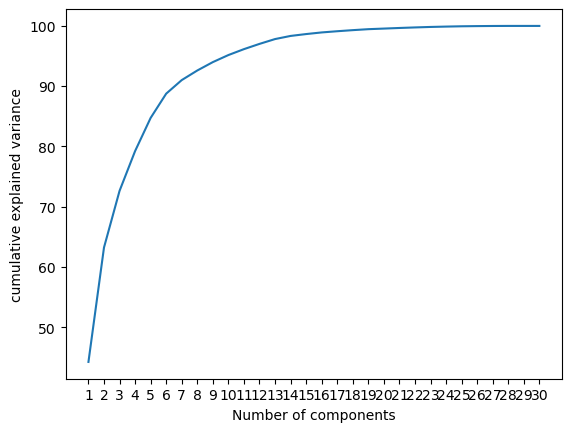

In [43]:
n_features=30
import matplotlib.pyplot as plt
%matplotlib inline
eig_vals_total=sum(eig_vals)
xp_variance=[(i/eig_vals_total)*100 for i in eig_vals_sorted]
xp_variance=np.round(xp_variance,2)
cum_variance=np.cumsum(xp_variance)
print('explained variance: {}'.format(xp_variance))
print('cumulative variance: {}'.format(cum_variance))
array=[i for i in range(1,n_features+1)]
plt.plot(array,cum_variance)
plt.xticks(array)
plt.xlabel('Number of components')
plt.ylabel('cumulative explained variance')
plt.show()

In [44]:
k=10   # take k principal components which capture maximum variance in the data
W=eig_vecs_sorted[:k,:]
print(W.shape)
print(x_st.shape)

(10, 30)
(30, 569)


In [45]:
x_st=x_st.T
print('Shape of original data {}'.format(x_st.shape))
print(W.shape)
X_proj=x_st.dot(W.T) #project along the principal components
print('Shape of projected data {} '.format(X_proj.shape))

Shape of original data (569, 30)
(10, 30)
Shape of projected data (569, 10) 


Text(0.5, 1.0, '2 components captures 63.24 of total variance')

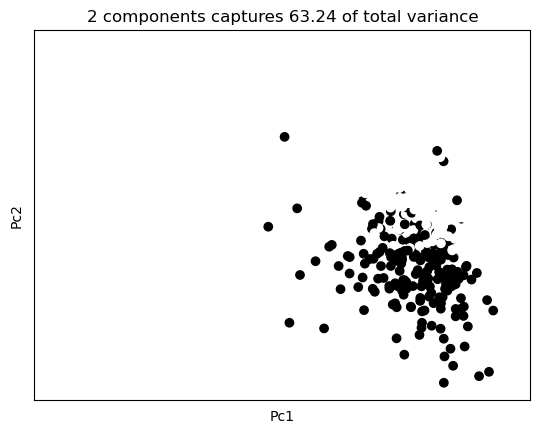

In [17]:
plt.scatter(X_proj[:,0],X_proj[:,1],c=y)
plt.xlabel('Pc1'); plt.xticks([])
plt.ylabel('Pc2'); plt.yticks([])
plt.title('2 components captures {} of total variance'.format(cum_variance[1]))

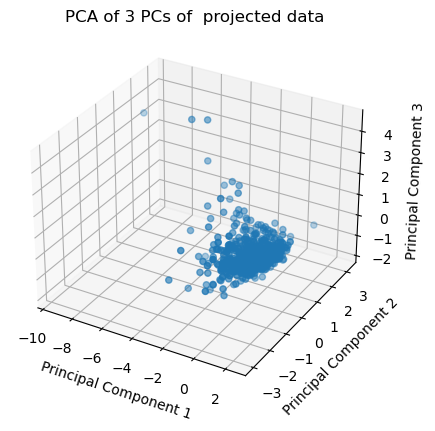

In [20]:
from mpl_toolkits.mplot3d import Axes3D
fig=plt.figure()
ax=fig.add_subplot(111, projection='3d')
ax.scatter(X_proj[:,0], X_proj[:,1], X_proj[:,2])
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
plt.title('PCA of 3 PCs of  projected data')
plt.show()